In [1]:
import jupyter_black

jupyter_black.load()

%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

from transformer import Transformer

In [ ]:
# create sample data
batch_size, seq_len, d_model = 32, 100, 512
output_size = 10

# sample input: sequences of vectors
x = torch.randn(batch_size, seq_len, d_model)
y = torch.randint(0, output_size, (batch_size, seq_len))

model = Transformer(
    d_model=d_model, n_heads=8, n_layers=6, d_ff=2048, output_size=output_size
)

output = model(x)

dataset = TensorDataset(x, y)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# train for a few epochs
model.fit(train_loader, criterion, optimizer, epochs=10)

Text(0.5, 0, 'epoch')

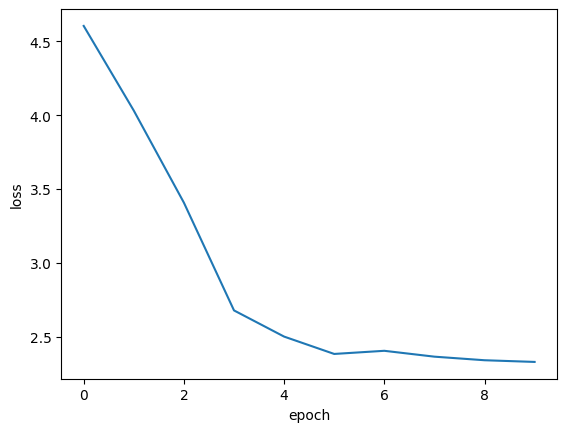

In [4]:
plt.plot(model.losses)
plt.ylabel("loss")
plt.xlabel("epoch")